In [96]:
%matplotlib inline
import numpy as np
from prondict import prondict
from lab2_proto import concatHMMs, forward,viterbi,backward,statePosteriors,gmmloglik,updateMeanAndVar
from lab2_tools import log_multivariate_normal_density_diag, logsumexp
from matplotlib import pyplot as plt


In [97]:
data = np.load('lab2_data.npz', allow_pickle=True)['data']
example=np.load('lab2_example.npz', allow_pickle=True)['example'].item()


In [98]:
phoneHMMs = np.load('lab2_models_onespkr.npz', allow_pickle=True)['phoneHMMs'].item()

In [99]:
list(sorted(phoneHMMs.keys()))

['ah',
 'ao',
 'ay',
 'eh',
 'ey',
 'f',
 'ih',
 'iy',
 'k',
 'n',
 'ow',
 'r',
 's',
 'sil',
 'sp',
 't',
 'th',
 'uw',
 'v',
 'w',
 'z']

In [100]:
phoneHMMs['sil']['transmat'].shape

(4, 4)

In [101]:
phoneHMMs['k']['transmat']

array([[0.8205889, 0.1794111, 0.       , 0.       ],
       [0.       , 0.6429007, 0.3570993, 0.       ],
       [0.       , 0.       , 0.8553886, 0.1446115],
       [0.       , 0.       , 0.       , 1.       ]])

In [102]:
isolated = {}
for digit in prondict.keys():
   isolated[digit] = ['sil'] + prondict[digit] + ['sil']

In [103]:
isolated

{'o': ['sil', 'ow', 'sil'],
 'z': ['sil', 'z', 'iy', 'r', 'ow', 'sil'],
 '1': ['sil', 'w', 'ah', 'n', 'sil'],
 '2': ['sil', 't', 'uw', 'sil'],
 '3': ['sil', 'th', 'r', 'iy', 'sil'],
 '4': ['sil', 'f', 'ao', 'r', 'sil'],
 '5': ['sil', 'f', 'ay', 'v', 'sil'],
 '6': ['sil', 's', 'ih', 'k', 's', 'sil'],
 '7': ['sil', 's', 'eh', 'v', 'ah', 'n', 'sil'],
 '8': ['sil', 'ey', 't', 'sil'],
 '9': ['sil', 'n', 'ay', 'n', 'sil']}

In [104]:
concatSounds = {}
for k,v in isolated.items():
   concatSounds[k] = concatHMMs(phoneHMMs, v)



[[0.8379803  0.1620197  0.         0.        ]
 [0.         0.9121278  0.08787217 0.        ]
 [0.         0.         0.7891916  0.2108084 ]
 [0.         0.         0.         0.        ]]
[[0.809113  0.190887  0.        0.       ]
 [0.        0.8904182 0.1095818 0.       ]
 [0.        0.        0.861858  0.1381421]
 [0.        0.        0.        1.       ]]
[[0.8379803  0.1620197  0.         0.         0.         0.
  0.        ]
 [0.         0.9121278  0.08787217 0.         0.         0.
  0.        ]
 [0.         0.         0.7891916  0.2108084  0.         0.
  0.        ]
 [0.         0.         0.         0.809113   0.190887   0.
  0.        ]
 [0.         0.         0.         0.         0.8904182  0.1095818
  0.        ]
 [0.         0.         0.         0.         0.         0.861858
  0.1381421 ]
 [0.         0.         0.         0.         0.         0.
  1.        ]]
newwwwwww
[[0.8379803  0.1620197  0.         0.         0.         0.
  0.        ]
 [0.         0.9121278

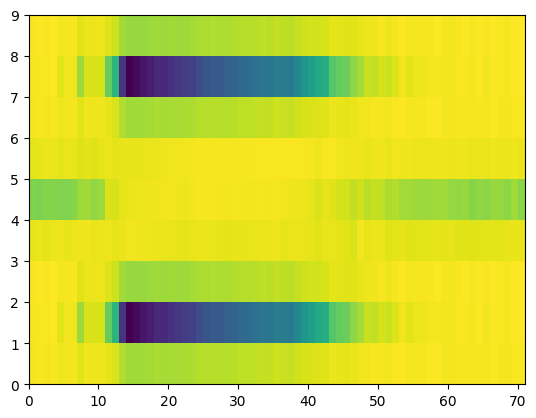

In [105]:
lpr= log_multivariate_normal_density_diag(example['lmfcc'], concatSounds['o']['means'], concatSounds['o']['covars'])
plt.pcolormesh(lpr.T)
plt.show()

/var/folders/sw/frm43jm935j5xdmb_jjlrt740000gn/T/ipykernel_58042/3478931281.py:1: RuntimeWarning: divide by zero encountered in log
  log_alpha = forward(example['obsloglik'], np.log(concatSounds['o']['startprob']), np.log(concatSounds['o']['transmat']))


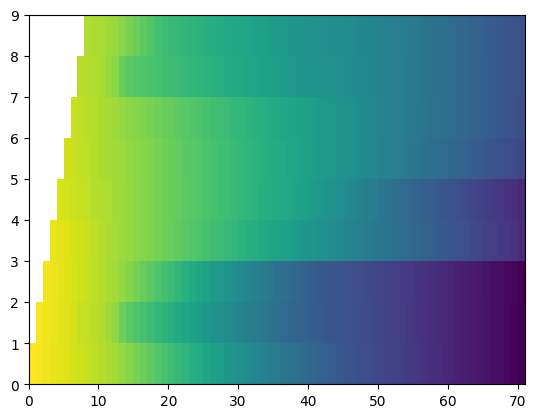

In [106]:
log_alpha = forward(example['obsloglik'], np.log(concatSounds['o']['startprob']), np.log(concatSounds['o']['transmat']))
plt.pcolormesh(log_alpha.T)
plt.show()

In [107]:
loglik = logsumexp(log_alpha[-1])
np.isclose(loglik, example['loglik'])

True

In [108]:
# results = []
# for utt in data:
#     loglikes = []
#     mx = -float('inf')
#     best = None
#     for hmm in concatSounds.values():
#         lpr = log_multivariate_normal_density_diag(utt['lmfcc'], hmm['means'], hmm['covars'])
#         log_alpha = forward(lpr, np.log(hmm['startprob']), np.log(hmm['transmat']))
#         loglik = logsumexp(log_alpha[-1])
#         if loglik > mx:
#             mx = loglik
#             best = hmm
#     results.append((best, utt['digit'], utt['gender']))

We noticed overfitting by gender

In [109]:
# results

In [110]:
viterbi_loglik,viterbi_path = viterbi(example['obsloglik'], np.log(concatSounds['o']['startprob']), np.log(concatSounds['o']['transmat']))
print(viterbi_loglik, viterbi_path)

-5974.211288357338 [0 1 1 1 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 7 8 8 8 8 8 8 8 8 8 8]


/var/folders/sw/frm43jm935j5xdmb_jjlrt740000gn/T/ipykernel_58042/2482633639.py:1: RuntimeWarning: divide by zero encountered in log
  viterbi_loglik,viterbi_path = viterbi(example['obsloglik'], np.log(concatSounds['o']['startprob']), np.log(concatSounds['o']['transmat']))


In [111]:
# results=[]
# for utt in data:
#     loglikes = []
#     mx = -float('inf')
#     best = None
#     for hmm in concatSounds.values():
#         lpr=log_multivariate_normal_density_diag(utt['lmfcc'], hmm['means'], hmm['covars'])
#         viterbi_loglik,viterbi_path = viterbi(lpr, np.log(hmm['startprob']), np.log(hmm['transmat']))
#         if viterbi_loglik > mx:
#             mx = viterbi_loglik
#             best = hmm
#     results.append((best['name'],utt['digit'],utt['gender']))
# results
    

In [112]:
#optional
log_beta=backward(example['obsloglik'], np.log(concatSounds['o']['startprob']), np.log(concatSounds['o']['transmat']))
#compue using log_beta and the model parameters the log likelihood of the observation sequence
loglik=logsumexp(log_beta[0]+np.log(concatSounds['o']['startprob'][:-1])+example['obsloglik'][0])
print(loglik,example['loglik'])





/var/folders/sw/frm43jm935j5xdmb_jjlrt740000gn/T/ipykernel_58042/3165409269.py:2: RuntimeWarning: divide by zero encountered in log
  log_beta=backward(example['obsloglik'], np.log(concatSounds['o']['startprob']), np.log(concatSounds['o']['transmat']))
/var/folders/sw/frm43jm935j5xdmb_jjlrt740000gn/T/ipykernel_58042/3165409269.py:4: RuntimeWarning: divide by zero encountered in log
  loglik=logsumexp(log_beta[0]+np.log(concatSounds['o']['startprob'][:-1])+example['obsloglik'][0])


-5970.427602563562 -5970.427602563561


In [113]:
log_gamma=statePosteriors(log_alpha,log_beta)



In [114]:
#6.2
hmm=concatSounds['2']
data=data[10]
lpr=log_multivariate_normal_density_diag(data['lmfcc'], hmm['means'], hmm['covars'])
log_alpha = forward(lpr, np.log(hmm['startprob']), np.log(hmm['transmat']))
log_beta=backward(lpr, np.log(hmm['startprob']), np.log(hmm['transmat']))
log_gamma=statePosteriors(log_alpha,log_beta)
log_likelihood=logsumexp(log_alpha[-1])
print(log_likelihood)
i=0
new_loglike=None
while i<20 and (  new_loglike==None or new_loglike>log_likelihood+1):
    hmm['means'],hmm['covars']=updateMeanAndVar(data['lmfcc'],log_gamma)
    lpr=log_multivariate_normal_density_diag(data['lmfcc'], hmm['means'], hmm['covars'])
    log_alpha = forward(lpr, np.log(hmm['startprob']), np.log(hmm['transmat']))
    log_beta=backward(lpr, np.log(hmm['startprob']), np.log(hmm['transmat']))
    log_gamma=statePosteriors(log_alpha,log_beta)
    if new_loglike!=None:
        log_likelihood=new_loglike
    new_loglike=logsumexp(log_alpha[-1])
    i+=1
    print(i,log_likelihood,new_loglike)





/var/folders/sw/frm43jm935j5xdmb_jjlrt740000gn/T/ipykernel_58042/3264629714.py:5: RuntimeWarning: divide by zero encountered in log
  log_alpha = forward(lpr, np.log(hmm['startprob']), np.log(hmm['transmat']))
/var/folders/sw/frm43jm935j5xdmb_jjlrt740000gn/T/ipykernel_58042/3264629714.py:6: RuntimeWarning: divide by zero encountered in log
  log_beta=backward(lpr, np.log(hmm['startprob']), np.log(hmm['transmat']))
/var/folders/sw/frm43jm935j5xdmb_jjlrt740000gn/T/ipykernel_58042/3264629714.py:15: RuntimeWarning: divide by zero encountered in log
  log_alpha = forward(lpr, np.log(hmm['startprob']), np.log(hmm['transmat']))
/var/folders/sw/frm43jm935j5xdmb_jjlrt740000gn/T/ipykernel_58042/3264629714.py:16: RuntimeWarning: divide by zero encountered in log
  log_beta=backward(lpr, np.log(hmm['startprob']), np.log(hmm['transmat']))


-7445.6571319623545
1 -7445.6571319623545 -6442.930868557438
2 -6442.930868557438 -6310.953674332671
3 -6310.953674332671 -6304.696272624395
4 -6304.696272624395 -6280.428404494687
5 -6280.428404494687 -6268.663242694565
6 -6268.663242694565 -6261.999984049817
7 -6261.999984049817 -6229.9159626726105
8 -6229.9159626726105 -6215.044206500598
9 -6215.044206500598 -6203.474055334135
10 -6203.474055334135 -6202.968018082505
